Version 1.0.2

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [59]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [60]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [61]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [62]:
# YOUR CODE GOES HERE
print('Transactions: ', transactions.shape)
print('Items: ', items.shape)
print('Item Categories: ', item_categories.shape)
print('Shops:', shops.shape)

print(transactions.head())

Transactions:  (2935849, 6)
Items:  (22170, 3)
Item Categories:  (84, 2)
Shops: (60, 2)
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [63]:
transactions["item_revenue"] = transactions.item_price * transactions.item_cnt_day

In [64]:
transactions['date'] = pd.to_datetime(transactions['date'], format='%d.%m.%Y')
transactions['day'] = transactions['date'].dt.day.astype(int)
transactions['month'] = transactions['date'].dt.month.astype(int)
transactions['year'] = transactions['date'].dt.year.astype(int)

In [65]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_revenue,day,month,year
0,2013-01-02,0,59,22154,999.00,1.0,999.00,2,1,2013
1,2013-01-03,0,25,2552,899.00,1.0,899.00,3,1,2013
2,2013-01-05,0,25,2552,899.00,-1.0,-899.00,5,1,2013
3,2013-01-06,0,25,2554,1709.05,1.0,1709.05,6,1,2013
4,2013-01-15,0,25,2555,1099.00,1.0,1099.00,15,1,2013


In [66]:
newdf = transactions[transactions.year.isin(["2014"]) & transactions.month.isin(["9"])]

In [67]:
newdf.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_revenue,day,month,year
1953691,2014-09-24,20,5,1039,899.0,1.0,899.0,24,9,2014
1953692,2014-09-27,20,5,1015,449.0,1.0,449.0,27,9,2014
1953693,2014-09-07,20,5,1329,399.0,1.0,399.0,7,9,2014
1953694,2014-09-27,20,5,984,399.0,1.0,399.0,27,9,2014
1953695,2014-09-08,20,5,984,399.0,1.0,399.0,8,9,2014


In [68]:
grouped = newdf.groupby(["shop_id"])
maxTotalRevenue = max(grouped.item_revenue.agg(np.sum))

In [69]:
maxTotalRevenue

7982852.1999999564

In [70]:
# YOUR CODE GOES HERE
max_revenue = maxTotalRevenue
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.2


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [71]:
dfSummer = transactions[transactions.year.isin(["2014"]) & transactions.month.isin(["6","7","8"])]
dfSummer.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_revenue,day,month,year
1705909,2014-06-15,17,26,9532,399.00,1.0,399.00,15,6,2014
1705910,2014-06-10,17,26,9507,149.00,1.0,149.00,10,6,2014
1705911,2014-06-13,17,26,9509,246.32,1.0,246.32,13,6,2014
1705912,2014-06-03,17,26,9532,399.00,1.0,399.00,3,6,2014
1705913,2014-06-08,17,26,9532,399.00,1.0,399.00,8,6,2014


In [72]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [73]:
dfSummer = pd.merge(dfSummer, items, on='item_id', how='left')
dfSummer.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_revenue,day,month,year,item_name,item_category_id
0,2014-06-15,17,26,9532,399.00,1.0,399.00,15,6,2014,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
1,2014-06-10,17,26,9507,149.00,1.0,149.00,10,6,2014,В ПОИСКАХ НЕМО (регион),40
2,2014-06-13,17,26,9509,246.32,1.0,246.32,13,6,2014,В ПОСТЕЛИ С ВРАГОМ (BD),37
3,2014-06-03,17,26,9532,399.00,1.0,399.00,3,6,2014,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
4,2014-06-08,17,26,9532,399.00,1.0,399.00,8,6,2014,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30


In [74]:
gpCategory = dfSummer.groupby(["item_category_id"])
category_id_with_max_revenue = gpCategory.item_revenue.agg(np.sum)

In [75]:
category_id_with_max_revenue.head()

item_category_id
2    2755520.0
3    6854669.8
4      38833.2
5     418233.1
6    3360382.5
Name: item_revenue, dtype: float64

In [76]:
category_id_with_max_revenue.idxmax()

20

In [77]:
# YOUR CODE GOES HERE

category_id_with_max_revenue = category_id_with_max_revenue.idxmax()
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [78]:
id_price = transactions.loc[:, ["item_id", "item_price"]]
id_price["item_price"] = id_price.item_price.abs()
group = id_price.groupby("item_id")

In [79]:
counts = group.item_price.nunique()
constant_prices = len([index for index in counts.index if counts.loc[index] == 1])
print(constant_prices)

5926


In [80]:
# YOUR CODE GOES HERE

num_items_constant_price = constant_prices
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

In [81]:
dfShop25 = transactions[transactions.year.isin(["2014"]) & 
                        transactions.month.isin(["12"]) & 
                        transactions.shop_id.isin(["25"])]
dfShop25.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_revenue,day,month,year
2295837,2014-12-14,23,25,21752,399.0,1.0,399.0,14,12,2014
2295838,2014-12-13,23,25,21752,399.0,3.0,1197.0,13,12,2014
2295839,2014-12-26,23,25,21733,149.0,1.0,149.0,26,12,2014
2295840,2014-12-31,23,25,21732,149.0,1.0,149.0,31,12,2014
2295841,2014-12-30,23,25,21726,149.0,1.0,149.0,30,12,2014


In [82]:
gpShop = dfShop25.groupby("date")
count_per_day = gpShop.item_cnt_day.sum()
print(count_per_day.head())

date
2014-12-01    153.0
2014-12-02    169.0
2014-12-03    195.0
2014-12-04    164.0
2014-12-05    300.0
Name: item_cnt_day, dtype: float64


In [83]:
# pandas uses 1/n-1 by default, numpy uses 1/n
total_num_items_sold_var = count_per_day.var()
print("Variance for items sold per day: {}".format(total_num_items_sold_var))

Variance for items sold per day: 117167.70229885059


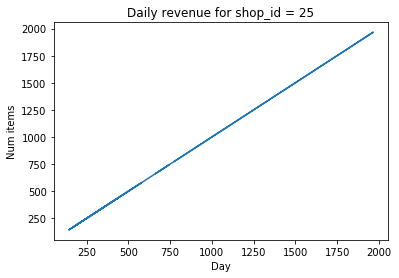

In [84]:
shop_id = 25

total_num_items_sold = # YOUR CODE GOES HERE
days = # YOUR CODE GOES HERE

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

In [85]:
total_num_items_sold_var = total_num_items_sold_var
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

Current answer for task total_num_items_sold_var is: 117167.702299


## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [86]:
STUDENT_EMAIL = 'rodrigolima82@gmail.com'
STUDENT_TOKEN = 'xM6EMjPx6ys52JPS'
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.2
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.702299


In [87]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)